## Import used libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Bitcoin WAP and Google SV

## 1.1 Import Bitcoin Price Data and Google Trends Data

Import the manipulated data from csv file:

In [2]:
bitcoin_weekly_price = pd.DataFrame.from_csv("Bitcoin Weekly Price Data.csv")
google_queries = pd.DataFrame.from_csv("Google Trends Relative Search Volume.csv")

/Users/Malte/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/Users/Malte/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


## 1.2 Join the two dataframes

In [3]:
google_queries_and_prices = pd.concat([bitcoin_weekly_price, google_queries], axis=1)
google_queries_and_prices = google_queries_and_prices.drop(["Week"],axis=1)
google_queries_and_prices.head()

,Date,Weekly Average Price,Relative Search Volume
0,2013-04-14,96.677143,6
1,2013-04-21,133.834286,3
2,2013-04-28,121.818571,3
3,2013-05-05,113.905714,2
4,2013-05-12,113.572857,3


## 1.3 Create Chart to illustrate development of Retail Investor Attention and Bitcoin Prices

In [4]:
google_queries_and_prices['Date'] = google_queries_and_prices['Date'].astype('datetime64[D]')

In [5]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, linewidth=1.0, color=c1)
    ax1.set_xlabel('Time (Months)')
    ax1.set_ylabel('Bitcoin WAP in USD', color="red" )

    ax2.plot(time, data2, linewidth=1.0, color=c2)
    ax2.set_ylabel('Google SV in %', color="blue")
    return ax1, ax2


def color_y_axis(ax, color):
    
    for x in ax.get_yticklabels():
        x.set_color(color)
    return None

/Users/Malte/anaconda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


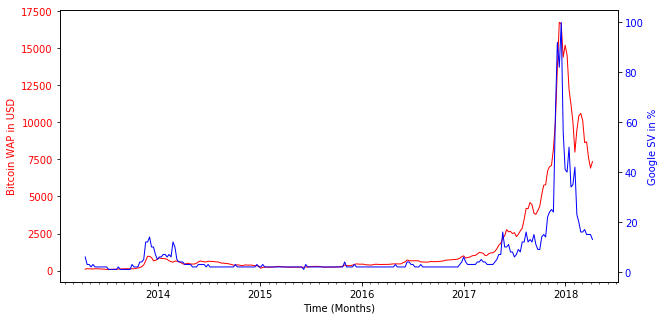

In [6]:
x = google_queries_and_prices['Date']
y1 = google_queries_and_prices['Weekly Average Price']
y2 = google_queries_and_prices['Relative Search Volume']


fig, ax = plt.subplots(figsize=(10,5))

ax1, ax2 = two_scales(ax, x, y1, y2, 'r', 'b')

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')

years = mdates.YearLocator()   
months = mdates.MonthLocator() 
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.show()

## 1.4 Summary Statistics on Google SVI

In [7]:
google_queries_and_prices["Relative Search Volume"].describe()

count    261.000000
mean       6.704981
std       12.558828
min        1.000000
25%        2.000000
50%        2.000000
75%        6.000000
max      100.000000
Name: Relative Search Volume, dtype: float64

## 1.5 Summary Statistics on the Weekly Average Bitcoin Price

In [8]:
google_queries_and_prices["Weekly Average Price"].describe()

count      261.000000
mean      1671.452501
std       3113.022772
min         78.815714
25%        272.744286
50%        501.625714
75%        960.222857
max      16732.182857
Name: Weekly Average Price, dtype: float64

# 2. Bitcoin WAV in USD and Google SVI

## 2.1 Import weekly average trading volume for bitcoin

In [9]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data USD.csv")

## 2.2 Join the two dataframes

In [10]:
google_queries_and_volume = pd.concat([bitcoin_weekly_volume, google_queries], axis=1)
google_queries_and_volume = google_queries_and_volume.drop(["Week"],axis=1)
google_queries_and_volume.head()

,Date,Average Volume per Week,Relative Search Volume
0,2013-04-14,1.815588e+06,6
1,2013-04-21,1.770383e+06,3
2,2013-04-28,1.770067e+06,3
3,2013-05-05,1.154001e+06,2
4,2013-05-12,8.223102e+05,3


## 2.3 Create Chart to illustrate development of Retail Investor Attention and Bitcoin Trading Volume

In [11]:
google_queries_and_volume['Date'] = google_queries_and_volume['Date'].astype('datetime64[D]')

In [12]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, linewidth=1.3, color=c1)
    ax1.set_xlabel('Time (Months)')
    ax1.set_ylabel('Bitcoin WAV in USD', color="green" )

    ax2.plot(time, data2, linewidth=1.0, color=c2)
    ax2.set_ylabel('Google SV in %', color="blue")
    return ax1, ax2


def color_y_axis(ax, color):
    
    for x in ax.get_yticklabels():
        x.set_color(color)
    return None

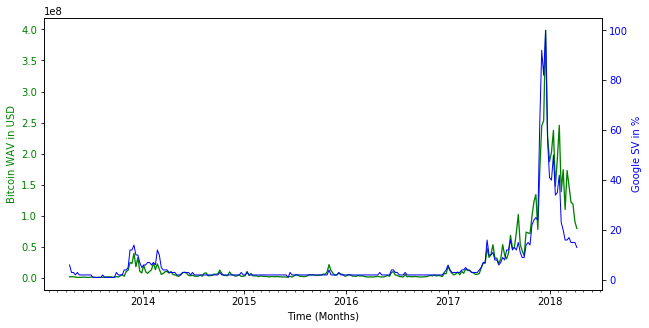

In [13]:
x = google_queries_and_volume['Date']
y1 = google_queries_and_volume['Average Volume per Week']
y2 = google_queries_and_volume['Relative Search Volume']


fig, ax = plt.subplots(figsize=(10,5))

ax1, ax2 = two_scales(ax, x, y1, y2, 'g', 'b')

color_y_axis(ax1, 'g')
color_y_axis(ax2, 'b')

years = mdates.YearLocator()   
months = mdates.MonthLocator() 
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.show()

## 2.4 Summary Statistics on Weekly Bitcoin Trading Volume

In [14]:
google_queries_and_volume["Average Volume per Week"].describe()

count    2.610000e+02
mean     2.461151e+07
std      5.342166e+07
min      6.740946e+05
25%      2.359730e+06
50%      4.545271e+06
75%      1.214338e+07
max      3.984850e+08
Name: Average Volume per Week, dtype: float64

# 3. Development of Bitcoin WAV in BTC 

In [15]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data BTC.csv")

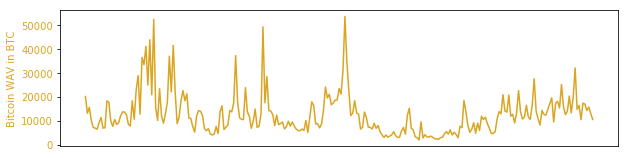

In [16]:
bitcoin_weekly_volume['Date'] = bitcoin_weekly_volume['Date'].astype('datetime64[ns]')
plt.figure(figsize=(10, 2.5 ))
plt.plot(bitcoin_weekly_volume['Date'], bitcoin_weekly_volume['Average Volume per Week (BTC)'], color='goldenrod')
plt.ylabel('Bitcoin WAV in BTC', color='goldenrod')
plt.yticks(color='goldenrod')
plt.xticks([])
plt.show()